# Boston House Price Prediction

https://www.kaggle.com/c/boston-housing

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - percentage lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

## Load the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
boston_df = pd.read_csv('boston.csv')

In [4]:
boston_df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


### Set X and Y Variables

In [6]:
boston_df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [7]:
X = np.array(boston_df[['crim', 'zn', 'indus', 'chas',
                        'nox', 'rm', 'age', 'dis', 'rad',
                        'tax', 'ptratio', 'black', 'lstat']])

In [8]:
Y = np.array(boston_df.medv)

In [9]:
X.shape

(333, 13)

In [10]:
Y.shape

(333,)

## Split dataset into train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_X, test_X, train_y, test_y = train_test_split( X, Y, test_size = 0.2)

In [13]:
train_X.shape

(266, 13)

In [14]:
test_X.shape

(67, 13)

### Normalize data

All variables need to be normalized to bring them onto one scale. To scale we can use standardization technique, which is subtracting mean and dividing by standard deviation.

The train and test data need to be normalized based on mean and std of training dataset, as the NN parameters will be estimated based on the training dataset.

In [15]:
## Calculate meand std from the training dataset
mean = train_X.mean(axis=0)
std = train_X.std(axis=0)

## Standardizing the training dataset
train_X -= mean
train_X /= std

## Standardizing the test dataset
test_X -= mean
test_X /= std

## Build NN Model

Explain:

1. NN Architecture
2. Layers and Neurons
3. Activation Functions
4. Loss Function
5. Backpropagation
6. Gradient Descent and variations of Gradient Descent

### Model 1:

In [16]:
import os
#os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.__version__)

3.10.0


In [29]:
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [30]:
model = keras.Sequential()

model.add(Dense(64, input_shape=(train_X.shape[1],)))

model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

### Setting up optimizer and learning rate


**Optimizer in Deep Learning**
An *optimizer* is an algorithm used to adjust the weights of a neural network to minimize the loss function during training. It determines how the model learns from data by updating parameters based on gradients computed via backpropagation. Popular optimizers include **Stochastic Gradient Descent (SGD)**, **Adam**, and **RMSProp**. For example, in SGD, the parameter update rule is:

$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta_t)
$$

where $\theta_t$ are the parameters at iteration $t$, $\eta$ is the learning rate, and $\nabla_\theta L(\theta_t)$ is the gradient of the loss with respect to the parameters. Advanced optimizers like Adam adaptively scale learning rates using estimates of first and second moments of gradients.

---

**Learning Rate in Deep Learning**
The *learning rate* ($\eta$) is a hyperparameter that controls the step size at each iteration while moving toward a minimum of the loss function. It determines how fast or slow the model learns: a small $\eta$ leads to slow convergence, while a large $\eta$ can cause the model to overshoot minima or diverge. It is crucial to balance speed and stability during training. Learning rate schedules and adaptive methods (e.g., in Adam or learning rate decay) are often used to adjust $\eta$ dynamically to improve training efficiency and convergence.


In [32]:
sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='mse',
              metrics=['mse'])

**EPOCH** - an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

**BATCH SIZE** - Total number of training examples present in a single batch. The backpropagation algorithms updates the weights after each batch size operation.

Usually the validation metrics are measured at the end of each epoch to measure progress of the learning in the neural network. (If it is underfitting or overfitting)

In [33]:
EPOCHS = 30

Explain how data would be taken in batches and run multiple epochs.

In [34]:
%%time
history = model.fit(
    train_X,
    train_y,  # prepared data
    epochs=EPOCHS,
    validation_data=(test_X, test_y),
    verbose=1
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 616.9740 - mse: 616.9740 - val_loss: 403.7180 - val_mse: 403.7180
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 324.2937 - mse: 324.2937 - val_loss: 102.3450 - val_mse: 102.3450
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 84.5778 - mse: 84.5778 - val_loss: 45.5503 - val_mse: 45.5503
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 50.3278 - mse: 50.3278 - val_loss: 28.1542 - val_mse: 28.1542
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28.7959 - mse: 28.7959 - val_loss: 21.9087 - val_mse: 21.9087
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.4582 - mse: 27.4582 - val_loss: 18.9286 - val_mse: 18.9286
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.7372 - mse: 21.7372 - val_loss: 16.7525 - val_mse: 16.7525
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.8571 - mse: 22.8571 - val_loss: 15.1210 - val_mse: 15.1210
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [35]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sn

In [36]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [27]:
def plot_mse(hist):
    plt.plot(hist['mse'])
    plt.plot(hist['val_mse'])
    plt.title('MSE')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train',
                'test'],
               loc='upper left')
    plt.show()

def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train',
                'test'],
               loc='upper left')
    plt.show()

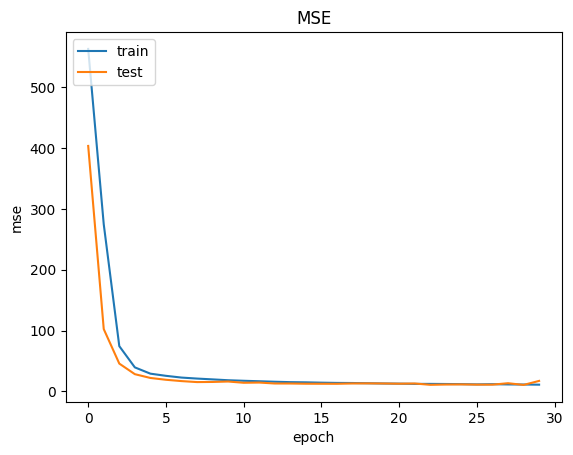

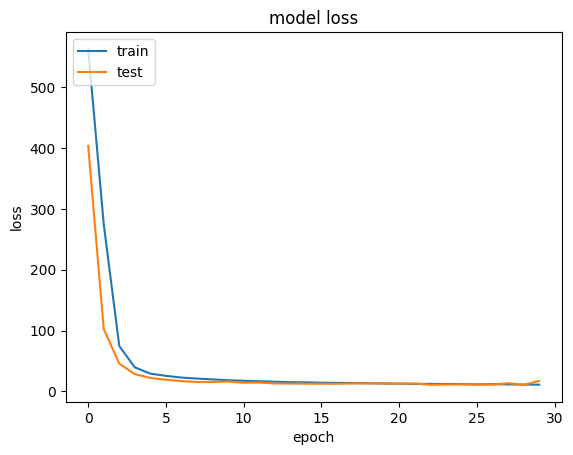

In [37]:
plot_loss(history.history)

## Participant Exercise

Create model by changing any of the followings:

1. Number of neurons
2. Number of layers
3. Activation functions : sigmoid, tanh, relu
4. Traing the model and check the error

### Callbacks

In [40]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [53]:
callbacks_list = [ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.1,
                                    patience=3),
                  EarlyStopping(monitor='val_loss',
                                patience=6),
                  ModelCheckpoint(filepath='boston_house_model.h5',
                                  monitor='val_loss',
                                  save_best_only=True)]

In [54]:
model_v1 = keras.models.clone_model(model)

In [55]:
sgd = SGD(learning_rate=0.001)
model_v1.compile(optimizer=sgd,
              loss='mse',
              metrics=['mse'])

In [56]:
%%time

EPOCHS = 100

history = model_v1.fit(
    train_X,
    train_y,  # prepared data
    epochs=EPOCHS,
    batch_size=16,
    callbacks = callbacks_list,
    validation_data=(test_X, test_y),
)

Epoch 1/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 9s 615ms/step - loss: 631.5503 - mse: 631.5503

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 491.4084 - mse: 491.4084 - val_loss: 89.8078 - val_mse: 89.8078 - learning_rate: 0.0010
Epoch 2/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 75.9855 - mse: 75.9855

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 74.3373 - mse: 74.3373 - val_loss: 32.4833 - val_mse: 32.4833 - learning_rate: 0.0010
Epoch 3/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 51.7928 - mse: 51.7928

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 32.4150 - mse: 32.4150 - val_loss: 22.5438 - val_mse: 22.5438 - learning_rate: 0.0010
Epoch 4/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15.3443 - mse: 15.3443

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.9447 - mse: 24.9447 - val_loss: 17.6654 - val_mse: 17.6654 - learning_rate: 0.0010
Epoch 5/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.8161 - mse: 15.8161

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.2031 - mse: 17.2031 - val_loss: 16.9477 - val_mse: 16.9477 - learning_rate: 0.0010
Epoch 6/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.9842 - mse: 8.9842

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.2363 - mse: 18.2363 - val_loss: 13.3995 - val_mse: 13.3995 - learning_rate: 0.0010
Epoch 7/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.4770 - mse: 12.4770

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.4386 - mse: 18.4386 - val_loss: 12.6860 - val_mse: 12.6860 - learning_rate: 0.0010
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0431 - mse: 15.0431 - val_loss: 12.7455 - val_mse: 12.7455 - learning_rate: 0.0010
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.1573 - mse: 12.1573 - val_loss: 13.9482 - val_mse: 13.9482 - learning_rate: 0.0010
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.8214 - mse: 16.8214 - val_loss: 13.0347 - val_mse: 13.0347 - learning_rate: 0.0010
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6979 - mse: 14.6979 - val_loss: 12.8944 - val_mse: 12.8944 - learning_rate: 1.0000e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9193 - mse: 9.9193 - val_loss: 13.0353 - val_mse: 13.0353 - learning_rate: 1.0000e-04
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0235 - mse: 15.0235 - val_loss: 12.8519 - val_mse: 12.8519 - learning_

### Saving the model

In [45]:
model_v1.save('boston_house_model.keras')

## Loading Model and Making Prediction

In [46]:
new_model = keras.models.load_model('boston_house_model.keras')

In [47]:
test_X[0:1]

array([[-0.23109969, -0.49458539,  1.57887732, -0.21735707,  0.65323932,
        -1.83351284,  1.17008811, -1.1789352 , -0.61943773,  0.21324458,
         1.3081305 ,  0.43512905,  3.23326705]])

In [48]:
house_price_pred = model.predict(test_X[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [57]:
test_y[0:1]

array([14.4])

In [49]:
house_price_pred[0]

array([14.406753], dtype=float32)

In [58]:
y_pred = model.predict(test_X)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
mse = mean_squared_error(test_y, y_pred)

In [63]:
import numpy as np

In [65]:
np.sqrt(mse)

np.float64(4.131956440658403)

In [68]:
r2_score(test_y, y_pred)

0.8019282686146901

The new data always need to be normalized with training data parameters (mean and standard deviation).

## Exercises

1. Experiment with the model architecture by
- adding layers
- changing the number of neurons
- chaging the activation functions

2. Run the model with different batch sizes

- BATCH_SIZE = 8
- BATCH_SIZE = 16

3. Save the best model and make predictions
